<center>
    <h1>Quelques calculs pour les exercices d'algèbre bilinéaire</h1>
    <h3>Préparation au Capes de l'université d'Aix-Marseille, mars 2020</h3>
    <h4>Thierry Coulbois</h4>
</center>

<p>On trouvera ici quelques calculs pour les exercices de la <a href="http://www.i2m.univ-amu.fr/perso/thierry.coulbois/2020/capes/td-algebre-bilineaire-capes-2020.pdf">feuille de TD</a> d'algèbre bilinéaire.</p>

<h3>Exercice V:</h3> orthonormaliser la base canonique de $R_2[X]$ pour le produit scalaire de l'intégrale entre 0 et 1.

In [5]:
A = QQ['X']
X = A.gen()
P0=1
P1=X
P2=X**2
print "La base canonique: ", P0,",",P1,",",P2

La base canonique:  1 , X , X^2


In [6]:
var('t')
integral(P0*P1(t),t,0,1)

1/2

<p>Le premier vecteur P0 est bien sûr de norme 1.</p>
<p>Calculons le deuxième vecteur de la base orthonormalisée</p>

In [7]:
Q1 = P1 - integral(P0*P1(t),t,0,1) * P0
print(Q1)

X - 1/2


<p>Maintenant (le carré de) la norme de Q1:</p>

In [15]:
integral(Q1(t)*Q1(t),t,0,1)

1/12

In [8]:
R1=2*sqrt(3)*Q1
print R1

sqrt(3)*(2*X - 1)


In [9]:
integral(P0*P2(t),t,0,1)

1/3

In [10]:
integral(R1(t)*P2(t),t,0,1)

1/6*sqrt(3)

In [11]:
Q2=P2-integral(P0*P2(t),t,0,1)*P0-integral(R1(t)*P2(t),t,0,1)*R1
print Q2

X^2 - X + 1/6


In [12]:
integral(Q2(t)*Q2(t),t,0,1)

1/180

In [13]:
R2 = Q2 / (sqrt(integral(Q2(t)*Q2(t),t,0,1)))
print R2

5*sqrt(1/5)*(6*X^2 - 6*X + 1)


Vérifions que (P0,R1,R2) est bien une base orthonormée:

In [14]:
print "Normes: ",integral(P0*P0,t,0,1),integral(R1(t)*R1(t),t,0,1),integral(R2(t)*R2(t),t,0,1)
print "Produits scalaires:"
print "P0 et R1: ",integral(P0*R1(t),t,0,1)
print "P0 et R2: ",integral(P0*R2(t),t,0,1)
print "R1 et R2: ",integral(R1(t)*R2(t),t,0,1)

Normes:  1 1 1
Produits scalaires:
P0 et R1:  0
P0 et R2:  0
R1 et R2:  0


Projetons la fonction sinus:

In [15]:
print "sin et P0: ", integral(sin(t)*P0,t,0,1)
print "sin et R1: ", integral(sin(t)*R1(t),t,0,1)
print "sin et P0: ", integral(sin(t)*R2(t),t,0,1)

sin et P0:  -cos(1) + 1
sin et R1:  -sqrt(3)*(cos(1) - 2*sin(1) + 1)
sin et P0:  sqrt(5)*(11*cos(1) + 6*sin(1) - 11)


Le projeté orthogonal:

In [16]:
Q = integral(sin(t)*P0,t,0,1)*P0 + integral(sin(t)*R1(t),t,0,1)*R1 + integral(sin(t)*R2(t),t,0,1)*R2
print Q

5*sqrt(5)*sqrt(1/5)*(6*X^2 - 6*X + 1)*(11*cos(1) + 6*sin(1) - 11) - 3*(2*X - 1)*(cos(1) - 2*sin(1) + 1) - cos(1) + 1


Évidemment le résultat n'est pas lisible. Essayons une approximation numérique (RR est le corps des nombres réels avec 53 bits de précision):

In [17]:
Qapprox = Q.polynomial(RR)
print Qapprox

-0.235461798092533*X^2 + 1.09129978057845*X - 0.00746493012652172


Nous pouvons comparer notre fonction initiale (sinus) avec le polynôme de degré 2 que nous venons de calculer: superposons les deux courbes.

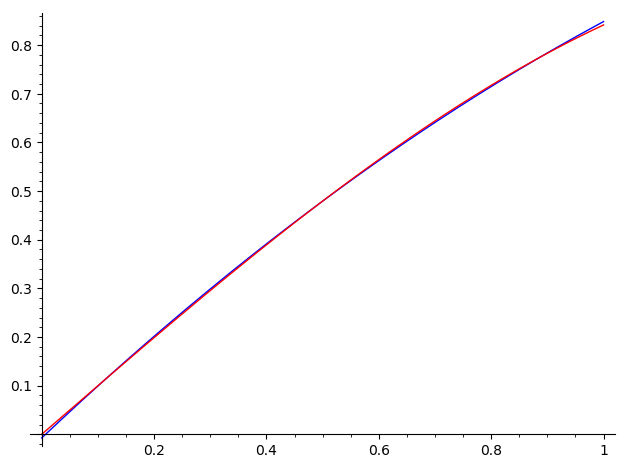

In [44]:
plot(Q,0,1)+plot(sin(t),0,1,color='red')

Waouh, les deux courbes sont vraiment très très proche. Spectaculaire !

<h2>Exercice VII:</h2> tracer l'ellipse d'équation $x^2-xy+y^2=1$.

<br>

Commençons par tracer !



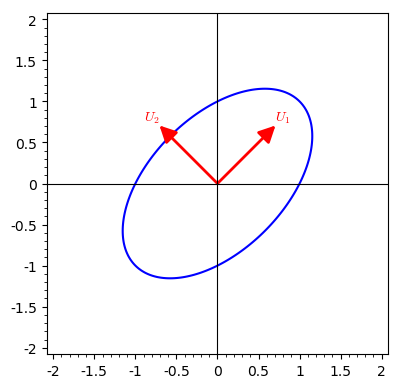

In [58]:
var('x,y')
G = implicit_plot(x**2-x*y+y**2-1,(x,-2,2),(y,-2,2),axes=true)
G += arrow((0,0),(sqrt(2)/2,sqrt(2)/2),color='red')
G += arrow((0,0),(-sqrt(2)/2,sqrt(2)/2),color='red')
G += text('$U_1$',(.8,.8),color='red')
G += text('$U_2$',(-.8,.8),color='red')
G.plot()

Calculons le changement de base (nous utilisons xx au lieu de x')

In [68]:
E = x**2-x*y+y**2-1
var('xx,yy')
EE = E(x=sqrt(2)/2*(xx-yy),y=sqrt(2)/2*(xx+yy))
print EE
print "forme simplifiée: ",EE.polynomial(QQ)

1/2*(xx + yy)^2 - 1/2*(xx + yy)*(xx - yy) + 1/2*(xx - yy)^2 - 1
forme simplifiée:  1/2*xx^2 + 3/2*yy^2 - 1


<h2>Exercice VI:</h2> tracer l'hyperbole d'équation $4x^2-24xy+11y^2=5$</h2>

<br>

Commençons par tracer !



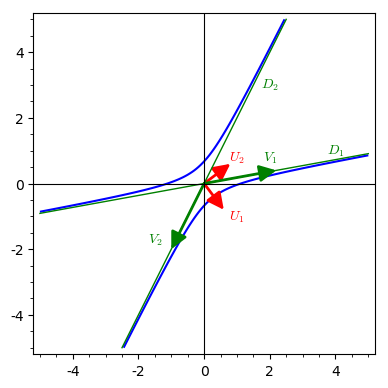

In [110]:
G = implicit_plot(4*x**2-24*x*y+11*y**2-5,(x,-5,5),(y,-5,5))
G += arrow((0,0),(3/5,-4/5),color='red')
G += text('$U_1$',(1,-1),color='red')
G += arrow((0,0),(4/5,3/5),color='red')
G += text('$U_2$',(1,.8),color='red')
G += line([(-5,-10/11),(5,10/11)],color='green')
G += text('$D_1$',(4,1),color='green')
G += line([(-2.5,-5),(2.5,5)],color='green')
G += text('$D_2$',(2,3),color='green')
G += arrow((0,0),(11/5,2/5),color='green')
G += text('$V_1$',(2,.8),color='green')
G += arrow((0,0),(-1,-2),color='green')
G += text('$V_2$',(-1.5,-1.7),color='green')

G.show(axes=true)

Remarquez que les vecteurs propres $U_1$ et $U_2$ sont des vecteurs directeurs des deux bissectrices des asymptotes (en vert). 

In [19]:
A = matrix ([[4,-12],[-12,11]])
print A

[  4 -12]
[-12  11]


In [20]:
A.characteristic_polynomial()

x^2 - 15*x - 100

In [21]:
A.eigenvalues()

[20, -5]

In [22]:
A.eigenvectors_right()

[(20, [
  (1, -4/3)
  ], 1), (-5, [
  (1, 3/4)
  ], 1)]

<p>L'affichage ci-dessus n'est pas complètement lisible: pour chacune des deux valeurs propres, aparait un vecteur propre et la multilplicité algébrique correspondante (ici toujours 1).</p>

In [23]:
l = A.eigenvectors_right()
U20 = l[0][1][0]
U5 = l[1][1][0]
print U20,U5

(1, -4/3) (1, 3/4)


<p>On normalise les vecteurs propres:</p>

In [27]:
U20 = 3/5 * U20
U5 = 4/5 * U5

<p>Calculons la matrice de passage (notez le <code>transpose()</code> pour mettre les vecteurs en colonne)</p>

In [28]:
P = matrix([U20,U5]).transpose()
print P

[ 3/5  4/5]
[-4/5  3/5]


<p>P est bien une matrice orthogonale:</p>

In [29]:
P.transpose()*P

[1 0]
[0 1]

<p>On peut donc diagonaliser la matrice A de la forme quadratique:</p>

In [30]:
P.transpose()*A*P

[20  0]
[ 0 -5]

<p>Dans la nouvelle base l'équation de l'hyperbole est donc $20x'^2-5y'^2=5$</p>
<p>Nous pouvons refaire le graphique dans ce nouveau repère.</p>

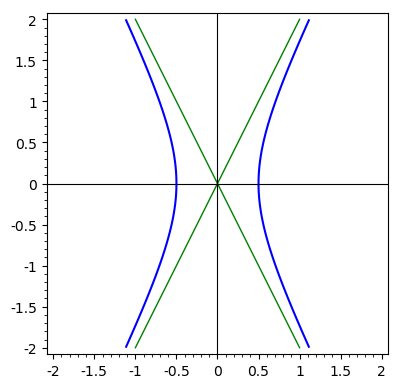

In [34]:
var('xx,yy')
G = implicit_plot(20*xx**2-5*yy**2-5,(xx,-2,2),(yy,-2,2))
G += line([(-1,-2),(1,2)],color='green')
G += line([(-1,2),(1,-2)],color='green')
G.show(axes=true)